<a href="https://colab.research.google.com/github/CHBendiksby/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Business Applications: Final Project**
###*By Maberg Olof Joakim Eriksson and Christoffer Hvass Bendiksby*

## Things to Install

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import io
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn import tree
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as pdr
import yfinance as yf
import math
import nltk
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.stem import WordNetLemmatizer
WNlem = WordNetLemmatizer()
nltk.download('wordnet')
stop_words.update(['yes', 'i'])
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
import itertools
from collections import Counter
from wordcloud import WordCloud 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
!pip install -qq pyLDAvis
import pyLDAvis.gensim
from pandas import concat
from numpy import concatenate

##Uploading the Data

In [3]:
#Uploading the relevant data
data_spy =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Data_SPY_2018_2019.csv')
data_tsla =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Data_TSLA_2018_2019.csv')
data_tweets =pd.read_csv('https://raw.githubusercontent.com/CHBendiksby/Final_Project/main/Tweets_Elon_Musk.csv')

In [4]:
data_spy.head()

,Date,Time_Start,Time_End,Time_Zone,Close,Net_Chg,Open,High,Low,Volume
0,1/2/18,14:30:00,15:00:00,UTC,267.990,1.050,267.840,268.00,267.40,8746329
1,1/2/18,15:00:00,15:30:00,UTC,268.410,0.420,267.990,268.42,267.96,5145910
2,1/2/18,15:30:00,16:00:00,UTC,268.260,-0.150,268.410,268.45,267.96,4162492
3,1/2/18,16:00:00,16:30:00,UTC,268.155,-0.105,268.265,268.41,268.12,2718490
4,1/2/18,16:30:00,17:00:00,UTC,268.150,-0.005,268.160,268.18,267.99,2144172


In [5]:
data_tsla.head()

,Date,Time_Start,Time_End,Time_Zone,Close,Net_Chg,Open,High,Low,Volume
0,1/2/18,14:30:00,15:00:00,UTC,63.466,1.196,62.400,63.542,62.200,3367615
1,1/2/18,15:00:00,15:30:00,UTC,63.471,0.005,63.464,63.774,63.430,2287470
2,1/2/18,15:30:00,16:00:00,UTC,63.610,0.139,63.484,63.670,63.280,1323565
3,1/2/18,16:00:00,16:30:00,UTC,64.152,0.542,63.606,64.156,63.550,2069670
4,1/2/18,16:30:00,17:00:00,UTC,64.103,-0.049,64.146,64.422,63.976,1379955


In [6]:
data_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.280000e+18,1.280000e+18,1.590000e+12,7/14/2020,7:28:03,UTC,44196397,elonmusk,Elon Musk,NaN,Cute,['teslarati'],[],[],222,176,7883,[],[],https://twitter.com/elonmusk/status/1282939902...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
1,1.280000e+18,1.280000e+18,1.590000e+12,7/14/2020,1:10:26,UTC,44196397,elonmusk,Elon Musk,NaN,Wow,"['davidtayar5', 'teslalisa', 'stevehamel16', '...",[],[],346,180,4241,[],[],https://twitter.com/elonmusk/status/1282844872...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:34:13,UTC,44196397,elonmusk,Elon Musk,NaN,Reusability is essential. A rocket that is sin...,['katlinegrey'],[],[],102,126,1551,[],[],https://twitter.com/elonmusk/status/1282805559...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
3,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:12:52,UTC,44196397,elonmusk,Elon Musk,NaN,Wild times!,['vincent13031925'],[],[],438,415,13421,[],[],https://twitter.com/elonmusk/status/1282800187...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
4,1.280000e+18,1.280000e+18,1.590000e+12,7/13/2020,22:12:26,UTC,44196397,elonmusk,Elon Musk,NaN,We’re being extra paranoid. Maximizing probabi...,['spaceflightnow'],[],[],128,155,4238,[],[],https://twitter.com/elonmusk/status/1282800078...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN


##Cleaning and Visualizing the Market Data

In [7]:
#Adding the percentage change column for later use
data_spy['Pct_Chg_Spy']=(data_spy['Close']/data_spy['Open']-1)*100
data_tsla['Pct_Chg_Tsla']=(data_tsla['Close']/data_tsla['Open']-1)*100

In [8]:
#Combinig date and time
data_spy['DateTime']=pd.to_datetime(data_spy['Date'].apply(str)+' '+data_spy['Time_Start'].apply(str))
data_tsla['DateTime']=pd.to_datetime(data_tsla['Date'].apply(str)+' '+data_tsla['Time_Start'].apply(str))

In [9]:
#Dropping unesessary columns
data_spy_cleaned=data_spy.drop(columns=['Date','Time_Start','Time_End','Time_Zone','Net_Chg','Open','High','Low','Volume'])
data_tsla_cleaned=data_tsla.drop(columns=['Date','Time_Start','Time_End','Time_Zone','Net_Chg','Open','High','Low','Volume'])

In [10]:
#Changing order of columns
data_spy_cleaned=data_spy_cleaned[['DateTime','Close','Pct_Chg_Spy']]
data_tsla_cleaned=data_tsla_cleaned[['DateTime','Close','Pct_Chg_Tsla']]

In [11]:
#Changing column names
data_spy_cleaned.columns=['Date_Time','Close_Spy','Pct_Chg_Spy']
data_tsla_cleaned.columns=['Date_Time','Close_Tsla','Pct_Chg_Tsla']

In [12]:
data_spy_cleaned.head()

,Date_Time,Close_Spy,Pct_Chg_Spy
0,2018-01-02 14:30:00,267.990,0.056004
1,2018-01-02 15:00:00,268.410,0.156722
2,2018-01-02 15:30:00,268.260,-0.055885
3,2018-01-02 16:00:00,268.155,-0.041004
4,2018-01-02 16:30:00,268.150,-0.003729


In [13]:
data_tsla_cleaned.head()

,Date_Time,Close_Tsla,Pct_Chg_Tsla
0,2018-01-02 14:30:00,63.466,1.708333
1,2018-01-02 15:00:00,63.471,0.011030
2,2018-01-02 15:30:00,63.610,0.198475
3,2018-01-02 16:00:00,64.152,0.858410
4,2018-01-02 16:30:00,64.103,-0.067035


In [14]:
#Combinig tesla and market data into one table based on date and time
data_market=pd.merge(data_spy_cleaned,data_tsla_cleaned,on=['Date_Time'],how='right')

In [15]:
data_market.head()

,Date_Time,Close_Spy,Pct_Chg_Spy,Close_Tsla,Pct_Chg_Tsla
0,2018-01-02 14:30:00,267.990,0.056004,63.466,1.708333
1,2018-01-02 15:00:00,268.410,0.156722,63.471,0.011030
2,2018-01-02 15:30:00,268.260,-0.055885,63.610,0.198475
3,2018-01-02 16:00:00,268.155,-0.041004,64.152,0.858410
4,2018-01-02 16:30:00,268.150,-0.003729,64.103,-0.067035


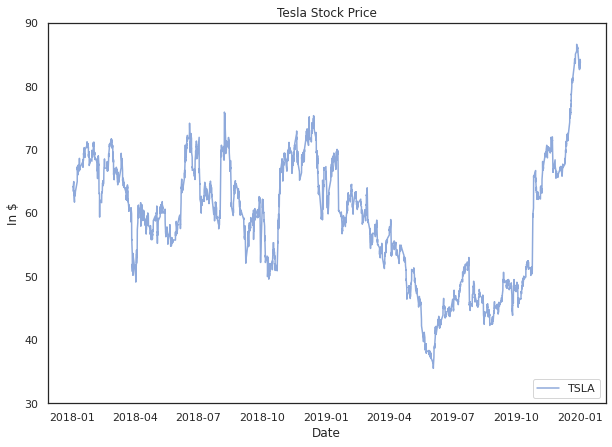

In [16]:
#Plot of tesla stock price
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Tsla,'#8EA9DB')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['TSLA'],loc=4)
ax=plt.gca()
ax.set_ylim([30,90])
plt.rcParams.update({'font.size':14})

plt.savefig('Tsla_Price_Plot')
plt.show()

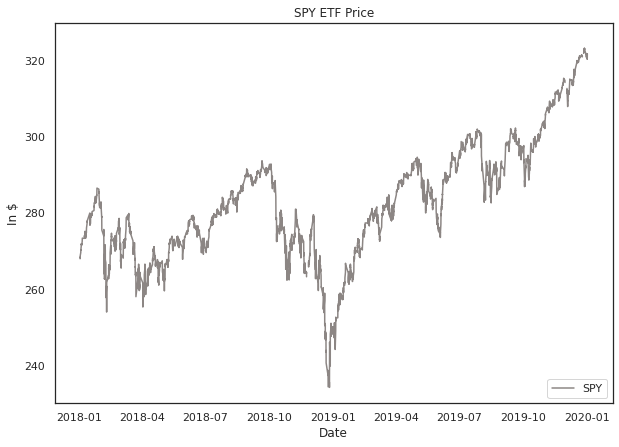

In [17]:
#Plot of market price
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Spy,'#8C8684')
plt.title('SPY ETF Price')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([230,330])
plt.rcParams.update({'font.size':14})

plt.savefig('Spy_Price_Plot')
plt.show()

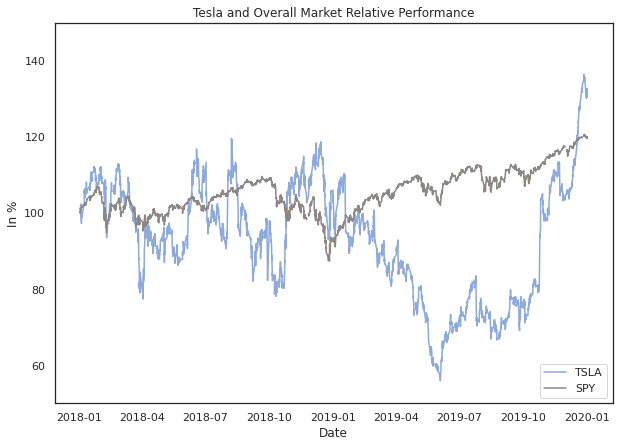

In [18]:
#Plot comparing performance of tesla compared to overall market in time interval
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Close_Tsla/data_market.Close_Tsla.iloc[0]*100,'#8EA9DB')
plt.plot(data_market.Date_Time,data_market.Close_Spy/data_market.Close_Spy.iloc[0]*100,'#8C8684')
plt.title('Tesla and Overall Market Relative Performance')
plt.xlabel('Date')
plt.ylabel('In %')
plt.legend(['TSLA','SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([50,150])
plt.rcParams.update({'font.size':14})

plt.savefig('Comp_Plot')
plt.show()

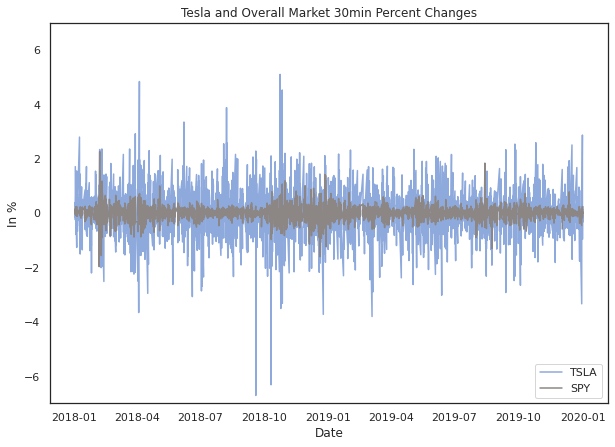

In [19]:
#Plot of tesla stock price and market price percentage changes per 30 min interval
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_market.Date_Time,data_market.Pct_Chg_Tsla,'#8EA9DB')
plt.plot(data_market.Date_Time,data_market.Pct_Chg_Spy,'#8C8684')
plt.title('Tesla and Overall Market 30min Percent Changes')
plt.xlabel('Date')
plt.ylabel('In %')
plt.legend(['TSLA','SPY'],loc=4)
ax=plt.gca()
ax.set_ylim([-7,7])
plt.rcParams.update({'font.size':14})

plt.savefig('Pct_Chg_Plot')
plt.show()

##Cleaning the Tweets

In [20]:
#Combining date and time into one column
data_tweets['DateTime']=pd.to_datetime(data_tweets['date'].apply(str)+' '+data_tweets['time'].apply(str))

In [21]:
#Dropping irrelevant columns
data_tweets_cleaned=data_tweets.drop(columns=['id','conversation_id','created_at','date','time','timezone','user_id','username','name','place','mentions','urls','replies_count','retweets_count','likes_count','hashtags','cashtags','link','retweet','quote_url','video','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest','photos'])

In [22]:
#Changing order and name
data_tweets_cleaned=data_tweets_cleaned[['DateTime','tweet']]
data_tweets_cleaned.columns=['Date_Time','Tweet']

In [23]:
#Only using tweets in 2018 and 2019
data_tweets_cleaned=data_tweets_cleaned[~(data_tweets_cleaned['Date_Time']>'2020-01-01')]
data_tweets_cleaned=data_tweets_cleaned[~(data_tweets_cleaned['Date_Time']<='2018-01-01')]
data_tweets_cleaned=data_tweets_cleaned.reset_index()

In [24]:
#Drop newly created column
data_tweets_cleaned=data_tweets_cleaned.drop(columns=['index'])

In [25]:
data_tweets_cleaned

,Date_Time,Tweet
0,2019-12-31 21:37:06,It’s a bit slow
1,2019-12-31 06:59:34,It’s not ready yet
2,2019-12-31 06:57:57,Explains 🐈 🎥
3,2019-12-31 02:27:28,Thanks all Tesla club members for helping out!...
4,2019-12-30 23:27:10,Rest in peace Syd Mead. Your art will endure.
...,...,...
5213,2018-01-07 02:33:02,"Gonna put an old school drive-in, roller skate..."
5214,2018-01-05 00:30:15,pic.twitter.com/3k71xzDIP1
5215,2018-01-05 00:30:00,Falcon Heavy goes vertical pic.twitter.com/uG1...
5216,2018-01-03 08:22:31,Using a neural net to detect rain using camera...


##Analyzing the Tweets

In [26]:
# Cleaning the tweets and getting lemmatized tokens and the same tokens as a string:

tweet_tokens = [tokenizer.tokenize(item) for item in data_tweets_cleaned['Tweet']]
tokens_cleaned = [[word.lower() for word in item if word not in stop_words and word.isalnum() and word.isalpha()] for item in tweet_tokens]
tokens_lem = [[WNlem.lemmatize(word) for word in token] for token in tokens_cleaned]
data_tweets_cleaned['lem_tokens'] = tokens_lem
data_tweets_cleaned['lem_tokens_string'] = data_tweets_cleaned['lem_tokens'].map(lambda row: " ".join(row))

print(data_tweets_cleaned['lem_tokens'][:10])
print(data_tweets_cleaned['lem_tokens_string'][:10])
# Looks good, but still some stopwords there? Adjusting in next cell:

0                                      [it, bit, slow]
1                                     [it, ready, yet]
2                                           [explains]
3    [thanks, tesla, club, member, helping, looking...
4          [rest, peace, syd, mead, your, art, endure]
5                                             [c, tbh]
6    [many, way, solve, problem, power, requirement...
7    [building, prototype, relatively, easy, volume...
8    [headed, tesla, fremont, factory, tomorrow, he...
9      [biting, i, chew, because, i, optimistic, fool]
Name: lem_tokens, dtype: object
0                                          it bit slow
1                                         it ready yet
2                                             explains
3    thanks tesla club member helping looking forwa...
4                  rest peace syd mead your art endure
5                                                c tbh
6    many way solve problem power requirement much ...
7    building prototype relativel

In [27]:
tokens_lem = [[word for word in item if word not in stop_words] for item in tokens_lem]
data_tweets_cleaned['lem_tokens'] = tokens_lem
data_tweets_cleaned['lem_tokens_string'] = data_tweets_cleaned['lem_tokens'].map(lambda row: " ".join(row))
print(data_tweets_cleaned['lem_tokens'][:10])
print(data_tweets_cleaned['lem_tokens_string'][:10])
# This looks better! :) 

0                                          [bit, slow]
1                                         [ready, yet]
2                                           [explains]
3    [thanks, tesla, club, member, helping, looking...
4                [rest, peace, syd, mead, art, endure]
5                                             [c, tbh]
6    [many, way, solve, problem, power, requirement...
7    [building, prototype, relatively, easy, volume...
8    [headed, tesla, fremont, factory, tomorrow, he...
9                     [biting, chew, optimistic, fool]
Name: lem_tokens, dtype: object
0                                             bit slow
1                                            ready yet
2                                             explains
3    thanks tesla club member helping looking forwa...
4                       rest peace syd mead art endure
5                                                c tbh
6    many way solve problem power requirement much ...
7    building prototype relativel

In [28]:
data_tweets_cleaned = data_tweets_cleaned[data_tweets_cleaned['lem_tokens_string'].map(len) > 5]
data_tweets_cleaned.shape

(4382, 4)

In [29]:
# Getting sentiment score: (We can do both on the tweets as they are or pre-process them first, returns similar values, unprocessed here:)
sid = SentimentIntensityAnalyzer()

# Sentiment scores on the unprocessed tweets: 
sentiment_scores = data_tweets_cleaned['Tweet'].apply(sid.polarity_scores)
data_tweets_cleaned['sentiment_score'] = sentiment_scores
data_tweets_cleaned['sentiment_score'] = data_tweets_cleaned['sentiment_score'].apply(lambda score_dict: score_dict['compound'])
print(data_tweets_cleaned['sentiment_score'].mean())


# Sentiment scores on the 
sentiment_score_processed = data_tweets_cleaned['lem_tokens_string'].apply(sid.polarity_scores)
data_tweets_cleaned['sentiment_score_processed'] = sentiment_score_processed
data_tweets_cleaned['sentiment_score_processed'] = data_tweets_cleaned['sentiment_score_processed'].apply(lambda score_dict: score_dict['compound'])
data_tweets_cleaned['sentiment_score_processed'].head()
print(data_tweets_cleaned['sentiment_score_processed'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.1794921268827016
0.18990730260155128


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


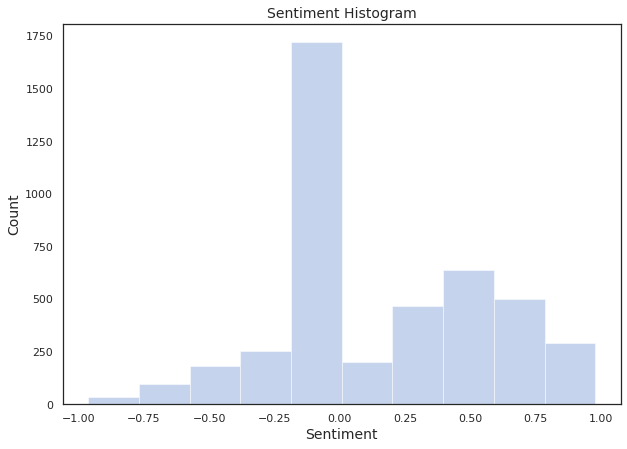

In [30]:
#Histogram plot of sentiment scores
sns.set(style='white')
num_bins = 10
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(data_tweets_cleaned.sentiment_score, num_bins, facecolor='#8EA9DB', alpha=0.5)
plt.xlabel('Sentiment',size=14)
plt.ylabel('Count',size=14)
plt.title('Sentiment Histogram',size=14)
plt.savefig('Sentiment Histogram')
plt.show();

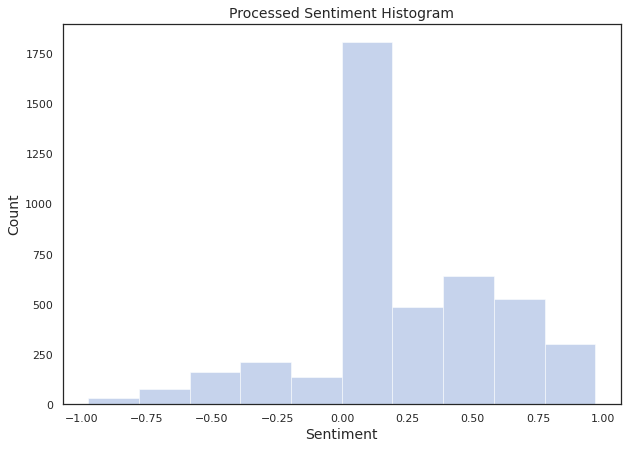

In [31]:
#Histogram plot of processed sentiment scores
sns.set(style='white')
num_bins = 10
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(data_tweets_cleaned.sentiment_score_processed, num_bins, facecolor='#8EA9DB', alpha=0.5)
plt.xlabel('Sentiment',size=14)
plt.ylabel('Count',size=14)
plt.title('Processed Sentiment Histogram',size=14)
plt.savefig('Processed Sentiment Histogram')
plt.show();

In [32]:
# Generating rolling mean
data_tweets_cleaned['rolling_sentiment'] = data_tweets_cleaned.sentiment_score.rolling(20).mean().shift(-19)
data_tweets_cleaned['rolling_sentiment_processed'] = data_tweets_cleaned.sentiment_score_processed.rolling(20).mean().shift(-19)
print(data_tweets_cleaned['rolling_sentiment'])
print(data_tweets_cleaned['rolling_sentiment_processed'])

0       0.030125
1       0.044665
2       0.077530
3       0.077530
4       0.039455
          ...   
5211         NaN
5213         NaN
5215         NaN
5216         NaN
5217         NaN
Name: rolling_sentiment, Length: 4382, dtype: float64
0       0.077480
1       0.088795
2       0.102580
3       0.102580
4       0.066200
          ...   
5211         NaN
5213         NaN
5215         NaN
5216         NaN
5217         NaN
Name: rolling_sentiment_processed, Length: 4382, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Seeing who Elon mentions most:
data_tweets_cleaned['mentions'] = data_tweets_cleaned['Tweet'].map(lambda textline: [tag for tag in tokenizer.tokenize(textline) if tag.startswith('@')])

muskmentions = data_tweets_cleaned[data_tweets_cleaned['mentions'].map(len) > 0]

musk_tags = itertools.chain(*muskmentions['mentions'])

counted_tags = Counter(musk_tags)
counted_tags.most_common()[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[('@SpaceX', 19),
 ('@NASA', 13),
 ('@Space_Station', 11),
 ('@lopezlinette', 7),
 ('@Hyperloop', 5),
 ('@BoringCompany', 5),
 ('@boringcompany', 4),
 ('@Reuters', 4),
 ('@businessinsider', 3),
 ('@Tesla', 3)]

<function matplotlib.pyplot.show>

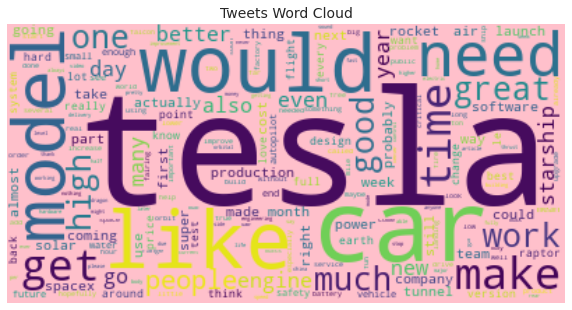

In [34]:
# Creating a wordcloud (can also get a nicer one without too much effort I think, a real cloud would be nice): 
stop_words.update([])

conc_string = data_tweets_cleaned['lem_tokens_string'].str.cat()
# Can't be too sure:
conc_string.strip(r'[" ,.!?:;"]')

cloud_musk_tweets = WordCloud(background_color = "pink",stopwords=stop_words).generate(conc_string)
plt.figure(figsize=(10,7))
plt.imshow(cloud_musk_tweets, interpolation='bilinear')
plt.title('Tweets Word Cloud', size=14)
plt.savefig('WordCLoud')
plt.axis('off')
plt.show

In [35]:
tesla_mentioned = data_tweets_cleaned['lem_tokens_string'].str.contains('tesla')
tesla_mentioned.sum()

490

In [36]:
data_tweets_cleaned['lem_tokens'].head(50) #looks alright

0                                           [bit, slow]
1                                          [ready, yet]
2                                            [explains]
3     [thanks, tesla, club, member, helping, looking...
4                 [rest, peace, syd, mead, art, endure]
6     [many, way, solve, problem, power, requirement...
7     [building, prototype, relatively, easy, volume...
8     [headed, tesla, fremont, factory, tomorrow, he...
9                      [biting, chew, optimistic, fool]
10    [hard, believe, almost, time, retire, cargo, d...
11                                            [exactly]
12                                         [talk, call]
13             [yeah, engineering, time, spacex, tesla]
14                                       [barrel, dome]
15            [took, embarrassingly, long, time, learn]
16                                       [sound, right]
17                        [beyond, awesome, real, deal]
18                                   [seems, lon

In [37]:
# Find when he mentions Tesla
data_tweets_cleaned['tesla_mentioned'] = data_tweets_cleaned['lem_tokens_string'].str.contains('tesla')
data_tweets_cleaned['tesla_mentioned'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


490

In [38]:
# TF-IDF

vect = TfidfVectorizer(max_features=1000,ngram_range=(1, 2), max_df=0.5, stop_words=stop_words)

corpus = data_tweets_cleaned['lem_tokens_string']
X = vect.fit_transform(corpus)
pd.DataFrame(X.A, columns=vect.get_feature_names())

,ability,able,absolutely,access,accident,according,account,accurate,achieve,across,action,active,actual,actually,add,adding,address,advanced,affect,affordable,ago,agreed,ai,aiming,air,aircraft,airframe,allow,almost,almost done,alone,along,already,also,although,altitude,aluminum,always,amazing,america,...,water,way,week,weekend,weight,welcome,well,wheel,white,whole,wide,wide release,win,wind,window,wing,wish,within,without,word,work,worked,working,world,worldwide,worse,worth,would,would cool,would great,wow,write,wrong,wrote,yeah,year,year ago,yet,zero,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.69786,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [39]:
# Topic modelling: 

%matplotlib inline
pyLDAvis.enable_notebook()

In [40]:
dictionary = Dictionary(data_tweets_cleaned['lem_tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in data_tweets_cleaned['lem_tokens']]

In [ ]:
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)


In [42]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


In [43]:
pyLDAvis.display(lda_display)

In [44]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.023*"time" + 0.019*"tesla" + 0.014*"spacex" + 0.014*"sure" + 0.014*"car" + 0.012*"good" + 0.012*"idea" + 0.012*"future" + 0.011*"made" + 0.010*"one"'),
 (1,
  '0.021*"tesla" + 0.020*"falcon" + 0.019*"heavy" + 0.015*"go" + 0.014*"mar" + 0.014*"earth" + 0.012*"super" + 0.012*"order" + 0.011*"help" + 0.011*"even"'),
 (2,
  '0.026*"car" + 0.015*"production" + 0.014*"high" + 0.012*"already" + 0.011*"speed" + 0.011*"max" + 0.011*"tunnel" + 0.011*"change" + 0.011*"test" + 0.010*"cost"'),
 (3,
  '0.018*"definitely" + 0.016*"high" + 0.015*"rocket" + 0.013*"also" + 0.011*"starship" + 0.011*"course" + 0.011*"small" + 0.010*"like" + 0.010*"low" + 0.010*"power"'),
 (4,
  '0.039*"year" + 0.029*"model" + 0.025*"next" + 0.023*"tesla" + 0.016*"week" + 0.015*"cool" + 0.015*"month" + 0.012*"time" + 0.012*"end" + 0.010*"maybe"'),
 (5,
  '0.042*"coming" + 0.031*"soon" + 0.021*"tesla" + 0.015*"haha" + 0.014*"would" + 0.011*"day" + 0.010*"game" + 0.009*"time" + 0.009*"system" + 0.009*"fun"'),
 (6,


##Trading Strategy

In [45]:
#Cleaning the data to only include what needed for the analysis
data_tweets_trading=data_tweets_cleaned.drop(columns=['Tweet','rolling_sentiment','lem_tokens','lem_tokens_string','mentions','sentiment_score','rolling_sentiment_processed'])
data_tweets_trading=data_tweets_trading[data_tweets_trading.tesla_mentioned==True]
data_tweets_trading=data_tweets_trading[data_tweets_trading.sentiment_score_processed!=0]
data_tweets_trading=data_tweets_trading.reset_index()
data_tweets_trading=data_tweets_trading.drop(columns='index')

In [46]:
data_tweets_trading.head()

,Date_Time,sentiment_score_processed,tesla_mentioned
0,2019-12-31 02:27:28,0.6249,True
1,2019-12-30 22:41:38,0.4019,True
2,2019-12-30 09:56:51,0.2960,True
3,2019-12-30 07:57:11,0.2263,True
4,2019-12-30 07:47:20,0.6369,True


In [47]:
#Rounding the time down to the nearest 30 min to make merging simpler
data_tweets_trading['Date_Time']=data_tweets_trading['Date_Time'].dt.floor(('30min'))

In [48]:
data_tweets_trading.head()

,Date_Time,sentiment_score_processed,tesla_mentioned
0,2019-12-31 02:00:00,0.6249,True
1,2019-12-30 22:30:00,0.4019,True
2,2019-12-30 09:30:00,0.2960,True
3,2019-12-30 07:30:00,0.2263,True
4,2019-12-30 07:30:00,0.6369,True


In [49]:
#Combining sentiment scores where we have mulitple data points on same date and time
data_tweets_trading=data_tweets_trading.groupby('Date_Time').agg(Average_Sentiment_Score=pd.NamedAgg(column='sentiment_score_processed',aggfunc=np.mean),)

In [50]:
data_tweets_trading.head()

,Average_Sentiment_Score
Date_Time,
2018-02-24 03:00:00,0.42010
2018-03-22 10:00:00,0.10270
2018-04-01 22:00:00,-0.14665
2018-04-02 18:30:00,0.22630
2018-04-02 19:00:00,-0.85910


In [51]:
#Merging the sentiment score data and the stock market data
data_tsla_trading=pd.merge(data_tsla_cleaned,data_tweets_trading,on='Date_Time')

In [52]:
data_tsla_trading.head()

,Date_Time,Close_Tsla,Pct_Chg_Tsla,Average_Sentiment_Score
0,2018-04-02 18:30:00,50.224,-0.119322,0.2263
1,2018-04-02 19:00:00,50.386,0.446553,-0.8591
2,2018-04-04 17:00:00,55.600,1.208679,0.4404
3,2018-04-13 19:30:00,59.987,-0.538865,-0.5859
4,2018-05-11 19:30:00,60.264,0.440000,0.3182


In [53]:
#Dropping unesessary columns
data_tsla_trading=data_tsla_trading.drop(columns=['Date_Time','Close_Tsla'])

In [54]:
data_tsla_trading.head()

,Pct_Chg_Tsla,Average_Sentiment_Score
0,-0.119322,0.2263
1,0.446553,-0.8591
2,1.208679,0.4404
3,-0.538865,-0.5859
4,0.440000,0.3182


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


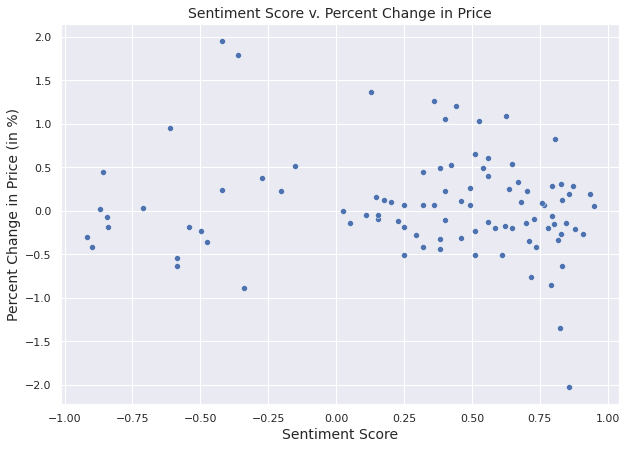

In [55]:
#Plotting to see if we initially can see any correlation between sentiment score and percentage change in stockprice
sns.set(style='darkgrid')
plt.figure(figsize=(10,7))
sns.scatterplot(data_tsla_trading['Average_Sentiment_Score'],data_tsla_trading['Pct_Chg_Tsla'])
plt.xlabel('Sentiment Score', size=14)
plt.ylabel('Percent Change in Price (in %)', size=14)
plt.title('Sentiment Score v. Percent Change in Price', size=14)
plt.savefig('Sentiment v Price scatter')
plt.show()

In [56]:
#Creating x and y variables for test
X=data_tsla_trading.iloc[:,1:]
y=data_tsla_trading.iloc[:,:-1]

In [57]:
X.head()

,Average_Sentiment_Score
0,0.2263
1,-0.8591
2,0.4404
3,-0.5859
4,0.3182


In [58]:
y.head()

,Pct_Chg_Tsla
0,-0.119322
1,0.446553
2,1.208679
3,-0.538865
4,0.440000


In [59]:
#Scaling the data
scaler = StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [60]:
X.shape

(96, 1)

In [61]:
y.shape

(96, 1)

In [62]:
#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [63]:
#Fit data using XGB Regressor
trading_model_1=XGBRegressor().fit(X_train,y_train)

[09:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
#Fit data using linear regression
trading_model_2=LinearRegression().fit(X_train,y_train)

In [65]:
#Score of using XGB
trading_model_1.score(X_test,y_test)

-2.9664252090936043

In [66]:
#Score of using linear regression
trading_model_2.score(X_test,y_test)

-0.030737571073587322

In [67]:
#Predicting and scaling back
trading_model_1_pred=trading_model_1.predict(X_test)
trading_model_1_pred=scaler.inverse_transform(trading_model_1_pred)
y_test=scaler.inverse_transform(y_test)

In [68]:
#Predicting and scaling back
trading_model_2_pred=trading_model_2.predict(X_test)
trading_model_2_pred=scaler.inverse_transform(trading_model_2_pred)

In [69]:
trading_model_1_pred.shape

(24,)

In [70]:
y_test.shape

(24, 1)

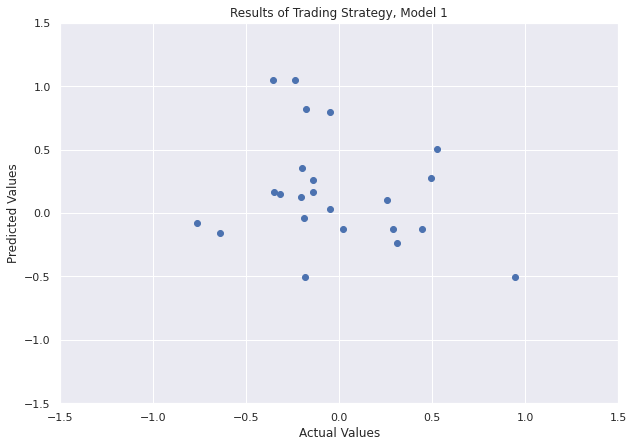

In [71]:
#Plotteing the results from model 1
sns.set(style='darkgrid')
plt.rcParams['figure.figsize']=(10,7)
plt.scatter(y_test,trading_model_1_pred)
plt.title('Results of Trading Strategy, Model 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax=plt.gca()
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1.5,1.5])
plt.rcParams.update({'font.size':14})

plt.savefig('Trading_model_1')
plt.show()

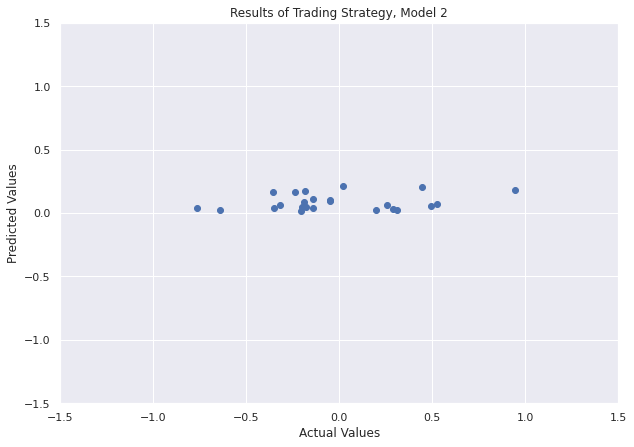

In [72]:
#Plotteing the results from model 2
sns.set(style='darkgrid')
plt.rcParams['figure.figsize']=(10,7)
plt.scatter(y_test,trading_model_2_pred)
plt.title('Results of Trading Strategy, Model 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax=plt.gca()
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1.5,1.5])
plt.rcParams.update({'font.size':14})

plt.savefig('Trading_model_2')
plt.show()

##Investment Strategy (RNN)

###Data

In [73]:
#Cleaning the data specific for this part
data_tweets_inv=data_tweets_cleaned.drop(columns=['Tweet','lem_tokens','rolling_sentiment','lem_tokens_string','mentions','sentiment_score','tesla_mentioned'])
data_tweets_inv=data_tweets_inv.dropna()
data_tweets_inv.columns=['Date','sentiment_score_processed','rolling_sentiment_processed']

In [74]:
data_tweets_inv.head()

,Date,sentiment_score_processed,rolling_sentiment_processed
0,2019-12-31 21:37:06,0.0000,0.077480
1,2019-12-31 06:59:34,0.3612,0.088795
2,2019-12-31 06:57:57,0.0000,0.102580
3,2019-12-31 02:27:28,0.6249,0.102580
4,2019-12-30 23:27:10,0.5423,0.066200


In [75]:
#Combining same day rolling sentiment into average of that day
data_tweets_inv=data_tweets_inv.groupby([data_tweets_inv['Date'].dt.date]).agg(Average_Rolling_Sentiment_Pro=pd.NamedAgg(column='rolling_sentiment_processed',aggfunc=np.mean),)
data_tweets_inv.index=pd.to_datetime(data_tweets_inv.index)

In [76]:
data_tweets_inv.head()

,Average_Rolling_Sentiment_Pro
Date,
2018-01-28,0.397814
2018-01-29,0.351180
2018-01-31,0.275928
2018-02-01,0.207210
2018-02-02,0.136221


In [77]:
#Getting daily Tesla stock price from yahoo finance
yf.pdr_override()
data_tsla_inv=pdr.get_data_yahoo('tsla',start='2018-01-01',end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [78]:
data_tsla_inv.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [79]:
#Cleaning the data
data_tsla_inv=data_tsla_inv.drop(columns=['Open','High','Low','Close','Volume'])
data_tsla_inv.columns=['Close_Tsla']

In [80]:
#Adding the 20 day moving average of the stock price
data_tsla_inv['rolling_Close_Tsla']=data_tsla_inv.Close_Tsla.rolling(20).mean()

In [81]:
data_tsla_inv.head()

,Close_Tsla,rolling_Close_Tsla
Date,,
2018-01-02,64.106003,NaN
2018-01-03,63.450001,NaN
2018-01-04,62.924000,NaN
2018-01-05,63.316002,NaN
2018-01-08,67.281998,NaN


In [82]:
#Combining the stock and tweet data based on the date, and including all points from both datasets
data_tsla_inv=pd.merge(data_tsla_inv,data_tweets_inv,on='Date',how='outer')

In [83]:
data_tsla_inv

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-02,64.106003,NaN,NaN
2018-01-03,63.450001,NaN,NaN
2018-01-04,62.924000,NaN,NaN
2018-01-05,63.316002,NaN,NaN
2018-01-08,67.281998,NaN,NaN
...,...,...,...
2019-12-21,NaN,NaN,0.265118
2019-12-22,NaN,NaN,0.119234
2019-12-28,NaN,NaN,0.190242


In [84]:
#For dates with no sentiment score we use the previous avaialable sentiment
data_tsla_inv.Average_Rolling_Sentiment_Pro=data_tsla_inv.Average_Rolling_Sentiment_Pro.fillna(method='ffill')
data_tsla_inv=data_tsla_inv.dropna()

In [85]:
data_tsla_inv

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-30,69.164001,67.559400,0.351180
2018-01-31,70.862000,67.897200,0.275928
2018-02-01,69.849998,68.217200,0.207210
2018-02-02,68.750000,68.508500,0.136221
2018-02-05,66.625999,68.673999,0.084556
...,...,...,...
2019-12-23,83.844002,71.384799,0.097385
2019-12-24,85.050003,72.273899,0.189933
2019-12-26,86.188004,73.294100,0.163063


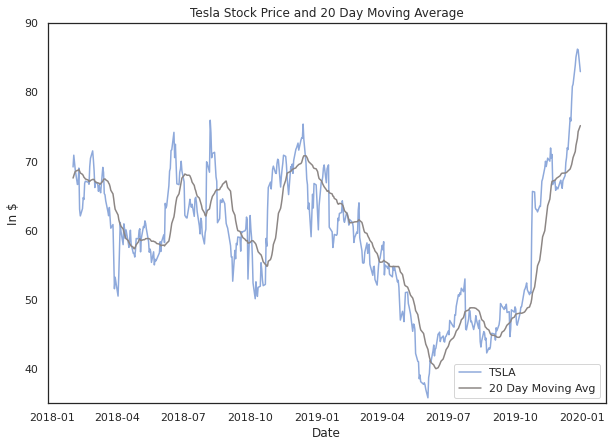

In [86]:
#Plotting stock price and moving average
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_tsla_inv.Close_Tsla,'#8EA9DB')
plt.plot(data_tsla_inv.rolling_Close_Tsla,'#8C8684')
plt.title('Tesla Stock Price and 20 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['TSLA','20 Day Moving Avg'],loc=4)
ax=plt.gca()
ax.set_ylim([35,90])
plt.rcParams.update({'font.size':14})

plt.savefig('Price and 20ma')
plt.show()

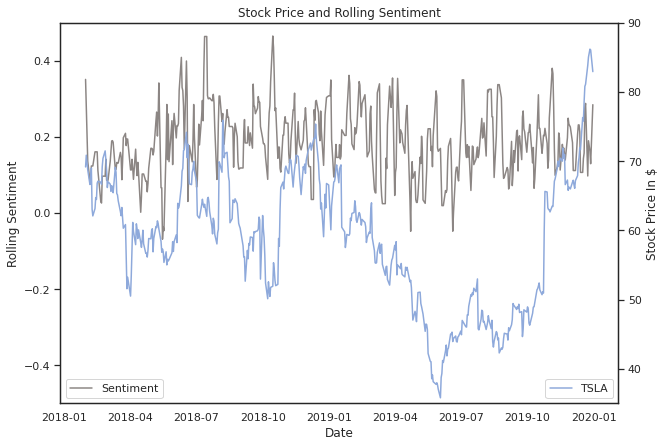

In [87]:
#Plotting the initial data
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
fig,ax1=plt.subplots()

ax1.plot(data_tsla_inv.Average_Rolling_Sentiment_Pro,'#8C8684')
ax1.legend(['Sentiment'],loc=3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Sentiment')
ax1.set_ylim([-0.5,0.5])

ax2=ax1.twinx()
ax2.plot(data_tsla_inv.Close_Tsla,'#8EA9DB')
ax2.legend(['TSLA'],loc=4)
ax2.set_ylabel('Stock Price In $')
ax2.set_ylim([35,90])

plt.rcParams.update({'font.size':14})
plt.title('Stock Price and Rolling Sentiment')
ax=plt.gca()

plt.savefig('Price_sentiment')
plt.show()

###Strategy 1

In [88]:
#Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/?fbclid=IwAR0vLK-DJYG7DtzP9QQS-vryOy8j5cRzYlgaWVITu_KMc3ilo-ZQ4pCuZok
np.random.seed(5)

In [89]:
data_tsla_inv.head(2)

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-30,69.164001,67.5594,0.351180
2018-01-31,70.862000,67.8972,0.275928


In [90]:
#Creating new data set
data_tsla_inv_scaled=data_tsla_inv
data_tsla_inv_scaled['Close_sc']=data_tsla_inv_scaled['Close_Tsla']
data_tsla_inv_scaled.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc
Date,,,,
2018-01-30,69.164001,67.5594,0.351180,69.164001
2018-01-31,70.862000,67.8972,0.275928,70.862000


In [91]:
#Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_tsla_inv_scaled.iloc[:,1:]=scaler.fit_transform(data_tsla_inv_scaled.iloc[:,1:])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
data_tsla_inv_scaled['close_sc+1']=data_tsla_inv_scaled.Close_sc.shift(-1,fill_value=data_tsla_inv_scaled.Close_sc.iloc[-1])
data_tsla_inv_scaled.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1
Date,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795


In [93]:
#Creating a matrix, with the four last columns
data_tsla_inv_scaled_mm=data_tsla_inv_scaled.iloc[:,1:].values.astype('float32')

In [94]:
data_tsla_inv_scaled_mm.shape

(483, 4)

In [95]:
#Creating test and train parts
train_size=int(len(data_tsla_inv_scaled_mm)*.75)
test_size=len(data_tsla_inv_scaled_mm)-train_size
train,test=data_tsla_inv_scaled_mm[0:train_size,:],data_tsla_inv_scaled_mm[train_size:len(data_tsla_inv_scaled_mm),:]

In [96]:
#The data to train and the data to test
X_train_2=train[:,:-1]
y_train_2=train[:,-1]
X_test_2=test[:,:-1]
y_test_2=test[:,-1]

In [97]:
X_train_2.shape

(362, 3)

In [98]:
y_test_2.shape

(121,)

In [99]:
#Reshaping and using 3 features
X_train_2=np.reshape(X_train_2,(X_train_2.shape[0],1,3))
X_test_2=np.reshape(X_test_2,(X_test_2.shape[0],1,3))

In [100]:
print(X_train_2.shape,y_train_2.shape,X_test_2.shape,y_test_2.shape)

(362, 1, 3) (362,) (121, 1, 3) (121,)


In [101]:
#Designing the network
model_inv=Sequential()
model_inv.add(LSTM(24,input_shape=(1,3)))
model_inv.add(Dense(1))
model_inv.compile(loss='mean_squared_error',optimizer='adam')

In [102]:
data_tsla_inv.head(2)

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1
Date,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795


In [103]:
model_inv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24)                2688      
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the network
# For graph creation of the loss functions:
history2 = model_inv.fit(X_train_2,y_train_2, epochs=50,batch_size=12,validation_data=(X_test_2,y_test_2),verbose=2,shuffle=False)

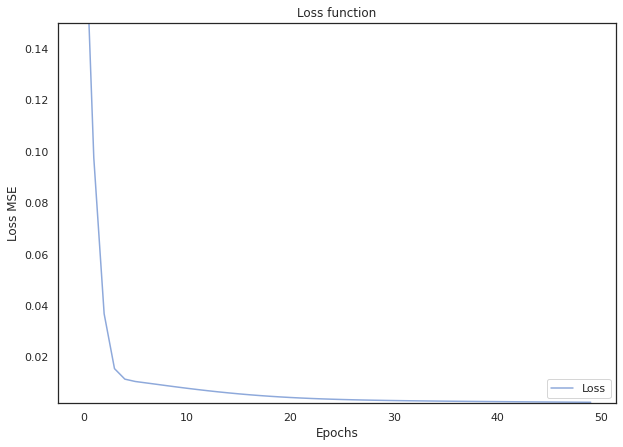

In [105]:
#Plot of loss function
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(history2.history['loss'],'#8EA9DB')
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss MSE')
plt.legend(['Loss'],loc=4)
ax=plt.gca()
ax.set_ylim([0.002,0.15])
plt.rcParams.update({'font.size':14})

plt.savefig('Loss_training')
plt.show()

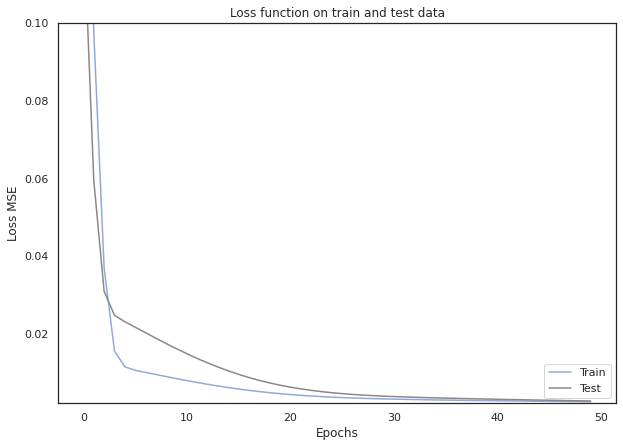

In [106]:
#Plot comparing performance of tesla compared to overall market in time interval
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(history2.history['loss'],'#8EA9DB')
plt.plot(history2.history['val_loss'],'#8C8684')
plt.title('Loss function on train and test data')
plt.xlabel('Epochs')
plt.ylabel('Loss MSE')
plt.legend(['Train','Test'],loc=4)
ax=plt.gca()
ax.set_ylim([0.002,0.1])
plt.rcParams.update({'font.size':14})

plt.savefig('Loss_functions')
plt.show()

In [107]:
#Predicting the test
test_predict = model_inv.predict(X_test_2)
X_test_2=X_test_2.reshape((X_test_2.shape[0],3))

In [108]:
#Predicting the train
train_predict = model_inv.predict(X_train_2)
X_train_2=X_train_2.reshape((X_train_2.shape[0],3))

In [109]:
#Inverting the test predict
test_predict_inv=concatenate((test_predict,X_test_2[:,-2:]),axis=1)
test_predict_inv=scaler.inverse_transform(test_predict_inv)
test_predict_inv=test_predict_inv[:,0]

In [110]:
#Inverting the test actual
y_test_2=y_test_2.reshape((len(y_test_2),1))
y_test_inv=concatenate((y_test_2,X_test_2[:,-2:]),axis=1)
y_test_inv=scaler.inverse_transform(y_test_inv)
y_test_inv=y_test_inv[:,0]

In [111]:
#Getting the mean squared error for the test score
test_score=math.sqrt(mean_squared_error(y_test_inv,test_predict_inv))
print(test_score)

1.7896148628533406


In [112]:
#Inverting the train predict
train_predict_inv=concatenate((train_predict,X_train_2[:,-2:]),axis=1)
train_predict_inv=scaler.inverse_transform(train_predict_inv)
train_predict_inv=train_predict_inv[:,0]

In [113]:
#Inverting the train actual
y_train_2=y_train_2.reshape((len(y_train_2),1))
y_train_inv=concatenate((y_train_2,X_train_2[:,-2:]),axis=1)
y_train_inv=scaler.inverse_transform(y_train_inv)
y_train_inv=y_train_inv[:,0]

In [114]:
#Getting the mean squared error for the train score
train_score=math.sqrt(mean_squared_error(y_train_inv,train_predict_inv))
print(train_score)

1.685610879365802


In [115]:
#Adding a new column for plotting
data_tsla_inv_scaled['Close_Pred']=data_tsla_inv_scaled['Close_Tsla']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
data_tsla_inv_scaled.head(2)

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1,Close_Pred
Date,,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876,69.164001
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795,70.862000


In [117]:
#Rows in the test
test_predict_inv.shape

(121,)

In [118]:
#Adding the predicted values
data_tsla_inv_scaled['Close_Pred'].iloc[-121:]=test_predict_inv.flatten()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
data_tsla_inv_scaled

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1,Close_Pred
Date,,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876,69.164001
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795,70.862000
2018-02-01,69.849998,0.803166,0.516827,0.675795,0.653967,69.849998
2018-02-02,68.750000,0.811458,0.383905,0.653967,0.611819,68.750000
2018-02-05,66.625999,0.816168,0.287164,0.611819,0.615153,66.625999
...,...,...,...,...,...,...
2019-12-23,83.844002,0.893326,0.311186,0.953486,0.977418,71.367897
2019-12-24,85.050003,0.918633,0.484477,0.977418,1.000000,72.566498
2019-12-26,86.188004,0.947671,0.434164,1.000000,0.997777,73.372627


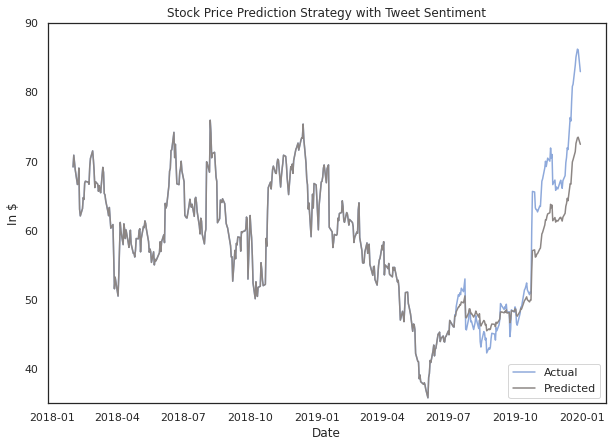

In [120]:
#Plot actual performance and predicted performance
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_tsla_inv_scaled.Close_Tsla,'#8EA9DB')
plt.plot(data_tsla_inv_scaled.Close_Pred,'#8C8684')
plt.title('Stock Price Prediction Strategy with Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['Actual','Predicted'],loc=4)
ax=plt.gca()
ax.set_ylim([35,90])
plt.rcParams.update({'font.size':14})


plt.savefig('Inv s1 plot, w tweets')
plt.show()

###Strategy 2

In [121]:
#Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/?fbclid=IwAR0vLK-DJYG7DtzP9QQS-vryOy8j5cRzYlgaWVITu_KMc3ilo-ZQ4pCuZok
np.random.seed(5)

In [122]:
#Cleaning the data specific for this part
data_tweets_inv=data_tweets_cleaned.drop(columns=['Tweet','lem_tokens','rolling_sentiment','lem_tokens_string','mentions','sentiment_score','tesla_mentioned'])
data_tweets_inv=data_tweets_inv.dropna()
data_tweets_inv.columns=['Date','sentiment_score_processed','rolling_sentiment_processed']

In [123]:
#Combining same day rolling sentiment into average of that day
data_tweets_inv=data_tweets_inv.groupby([data_tweets_inv['Date'].dt.date]).agg(Average_Rolling_Sentiment_Pro=pd.NamedAgg(column='rolling_sentiment_processed',aggfunc=np.mean),)
data_tweets_inv.index=pd.to_datetime(data_tweets_inv.index)

In [124]:
#Getting daily Tesla stock price from yahoo finance
yf.pdr_override()
data_tsla_inv=pdr.get_data_yahoo('tsla',start='2018-01-01',end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [125]:
#Cleaning the data
data_tsla_inv=data_tsla_inv.drop(columns=['Open','High','Low','Close','Volume'])
data_tsla_inv.columns=['Close_Tsla']

In [126]:
#Adding the 20 day moving average of the stock price
data_tsla_inv['rolling_Close_Tsla']=data_tsla_inv.Close_Tsla.rolling(20).mean()

In [127]:
#Combining the stock and tweet data based on the date, and including all points from both datasets
data_tsla_inv=pd.merge(data_tsla_inv,data_tweets_inv,on='Date',how='outer')

In [128]:
#For dates with no sentiment score we use the previous avaialable sentiment
data_tsla_inv.Average_Rolling_Sentiment_Pro=data_tsla_inv.Average_Rolling_Sentiment_Pro.fillna(method='ffill')
data_tsla_inv=data_tsla_inv.dropna()

In [129]:
data_tsla_inv.head(2)

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro
Date,,,
2018-01-30,69.164001,67.5594,0.351180
2018-01-31,70.862000,67.8972,0.275928


In [130]:
#Creating new data set
data_tsla_inv_scaled_2=data_tsla_inv
data_tsla_inv_scaled_2=data_tsla_inv_scaled_2.drop(columns='Average_Rolling_Sentiment_Pro')
data_tsla_inv_scaled_2['Close_sc']=data_tsla_inv_scaled_2['Close_Tsla']
data_tsla_inv_scaled_2.head(2)

,Close_Tsla,rolling_Close_Tsla,Close_sc
Date,,,
2018-01-30,69.164001,67.5594,69.164001
2018-01-31,70.862000,67.8972,70.862000


In [131]:
#Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_tsla_inv_scaled_2.iloc[:,1:]=scaler.fit_transform(data_tsla_inv_scaled_2.iloc[:,1:])

In [132]:
data_tsla_inv_scaled_2['close_sc+1']=data_tsla_inv_scaled_2.Close_sc.shift(-1,fill_value=data_tsla_inv_scaled_2.Close_sc.iloc[-1])
data_tsla_inv_scaled_2.head(2)

,Close_Tsla,rolling_Close_Tsla,Close_sc,close_sc+1
Date,,,,
2018-01-30,69.164001,0.784443,0.662182,0.695876
2018-01-31,70.862000,0.794058,0.695876,0.675795


In [133]:
#Creating a matrix, with the four last columns
data_tsla_inv_scaled_mm_2=data_tsla_inv_scaled_2.iloc[:,1:].values.astype('float32')

In [134]:
#Creating test and train parts
train_size=int(len(data_tsla_inv_scaled_mm_2)*.75)
test_size=len(data_tsla_inv_scaled_mm_2)-train_size
train,test=data_tsla_inv_scaled_mm_2[0:train_size,:],data_tsla_inv_scaled_mm_2[train_size:len(data_tsla_inv_scaled_mm_2),:]

In [135]:
#The data to train and the data to test
X_train_2=train[:,:-1]
y_train_2=train[:,-1]
X_test_2=test[:,:-1]
y_test_2=test[:,-1]

In [136]:
X_train_2.shape

(362, 2)

In [137]:
y_test_2.shape

(121,)

In [138]:
#Reshaping and using 2 features
X_train_2=np.reshape(X_train_2,(X_train_2.shape[0],1,2))
X_test_2=np.reshape(X_test_2,(X_test_2.shape[0],1,2))

In [139]:
print(X_train_2.shape,y_train_2.shape,X_test_2.shape,y_test_2.shape)

(362, 1, 2) (362,) (121, 1, 2) (121,)


In [140]:
#Designing the network
model_inv=Sequential()
model_inv.add(LSTM(24,input_shape=(1,2)))
model_inv.add(Dense(1))
model_inv.compile(loss='mean_squared_error',optimizer='adam')

In [141]:
model_inv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                2592      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 2,617
Trainable params: 2,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the network
model_inv.fit(X_train_2,y_train_2, epochs=50,batch_size=12,validation_data=(X_test_2,y_test_2),verbose=2,shuffle=False)

In [143]:
#Predicting the test
test_predict = model_inv.predict(X_test_2)
X_test_2=X_test_2.reshape((X_test_2.shape[0],2))

In [144]:
#Predicting the train
train_predict = model_inv.predict(X_train_2)
X_train_2=X_train_2.reshape((X_train_2.shape[0],2))

In [145]:
#Inverting the test predict
test_predict_inv=concatenate((test_predict,X_test_2[:,-1:]),axis=1)
test_predict_inv=scaler.inverse_transform(test_predict_inv)
test_predict_inv=test_predict_inv[:,0]

In [146]:
#Inverting the test actual
y_test_2=y_test_2.reshape((len(y_test_2),1))
y_test_inv=concatenate((y_test_2,X_test_2[:,-1:]),axis=1)
y_test_inv=scaler.inverse_transform(y_test_inv)
y_test_inv=y_test_inv[:,0]

In [147]:
#Getting the mean squared error for the test score
test_score=math.sqrt(mean_squared_error(y_test_inv,test_predict_inv))
print(test_score)

1.7601184554768412


In [148]:
#Inverting the train predict
train_predict_inv=concatenate((train_predict,X_train_2[:,-1:]),axis=1)
train_predict_inv=scaler.inverse_transform(train_predict_inv)
train_predict_inv=train_predict_inv[:,0]

In [149]:
#Inverting the train actual
y_train_2=y_train_2.reshape((len(y_train_2),1))
y_train_inv=concatenate((y_train_2,X_train_2[:,-1:]),axis=1)
y_train_inv=scaler.inverse_transform(y_train_inv)
y_train_inv=y_train_inv[:,0]

In [150]:
#Getting the mean squared error for the train score
train_score=math.sqrt(mean_squared_error(y_train_inv,train_predict_inv))
print(train_score)

1.6890099445815907


In [151]:
#Adding a new column for plotting
data_tsla_inv_scaled['Close_Pred']=data_tsla_inv_scaled['Close_Tsla']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
data_tsla_inv_scaled.head(2)

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1,Close_Pred
Date,,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876,69.164001
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795,70.862000


In [153]:
#Rows in the test
test_predict_inv.shape

(121,)

In [154]:
#Adding the predicted values
data_tsla_inv_scaled['Close_Pred'].iloc[-121:]=test_predict_inv.flatten()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
data_tsla_inv_scaled

,Close_Tsla,rolling_Close_Tsla,Average_Rolling_Sentiment_Pro,Close_sc,close_sc+1,Close_Pred
Date,,,,,,
2018-01-30,69.164001,0.784443,0.786403,0.662182,0.695876,69.164001
2018-01-31,70.862000,0.794058,0.645498,0.695876,0.675795,70.862000
2018-02-01,69.849998,0.803166,0.516827,0.675795,0.653967,69.849998
2018-02-02,68.750000,0.811458,0.383905,0.653967,0.611819,68.750000
2018-02-05,66.625999,0.816168,0.287164,0.611819,0.615153,66.625999
...,...,...,...,...,...,...
2019-12-23,83.844002,0.893326,0.311186,0.953486,0.977418,71.835609
2019-12-24,85.050003,0.918633,0.484477,0.977418,1.000000,72.737015
2019-12-26,86.188004,0.947671,0.434164,1.000000,0.997777,73.639549


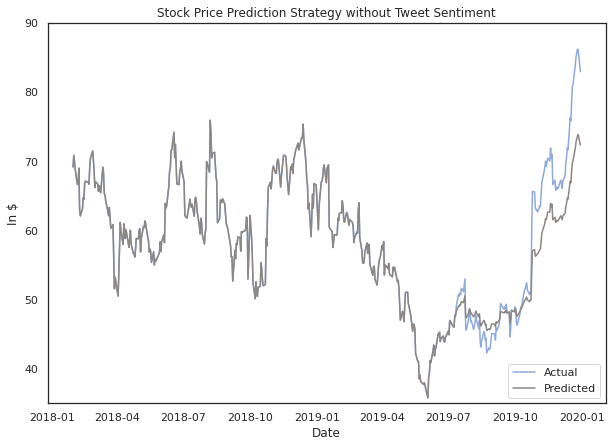

In [156]:
#Plot actual performance and predicted performance
sns.set(style='white')
plt.rcParams['figure.figsize']=(10,7)
plt.plot(data_tsla_inv_scaled.Close_Tsla,'#8EA9DB')
plt.plot(data_tsla_inv_scaled.Close_Pred,'#8C8684')
plt.title('Stock Price Prediction Strategy without Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('In $')
plt.legend(['Actual','Predicted'],loc=4)
ax=plt.gca()
ax.set_ylim([35,90])
plt.rcParams.update({'font.size':14})

plt.savefig('Inv s2 plot, wo tweets')
plt.show()

##Export

In [ ]:
#file-> download ipynb ->upload file ->chnage name->
!jupyter nbconvert ==to html "/content/Final_Project.ipynb"

[NbConvertApp] WARNING | pattern u'==to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] Converting notebook /content/Final_Project.ipynb to html
[NbConvertApp] Writing 1603537 bytes to /content/Final_Project.html
